# GAN_2D_Example

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

import torch
from torch import nn, optim

## Prepare Data

Text(0,0.5,'y1')

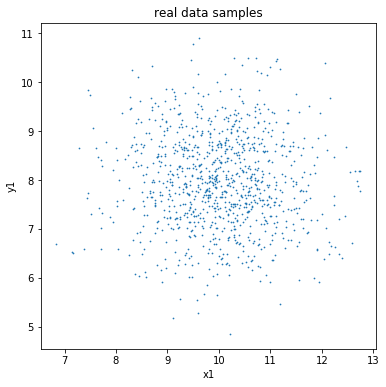

In [2]:
def sample_real(batch_size=100):
    x = torch.randn(batch_size, 2)   # x ~ N(mu=0,std=1)
    x[:,0] += 10
    x[:,1] += 8
    return x

plt.figure(figsize=[6,6])
x = sample_real(1000).numpy()
plt.scatter(x[:,0],x[:,1],0.5)
plt.title('real data samples')
plt.xlabel('x1')
plt.ylabel('y1')

## Define VAE model

In [3]:
# Discriminator
D = nn.Sequential(
    nn.Linear(2, 10),
    nn.LeakyReLU(0.2),
#     nn.Linear(50, 50),
#     nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid())

# Generator
z_dim = 10
G = nn.Sequential(
    nn.Linear(z_dim, 20),
    nn.LeakyReLU(0.2),
#     nn.Linear(50, 50),
#     nn.ReLU(),
    nn.Linear(20, 2))

D.cuda()
G.cuda()

Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=20, out_features=2, bias=True)
)

## Training GAN Model

In [4]:
batch_size = 300

#a helper function to plot results
def plot_decoder():
    plt.figure(figsize=[5,5])

    z = torch.randn(batch_size, z_dim).cuda()
    x_gen = G(z).data
    
    plt.scatter(x_gen[:,0],x_gen[:,1],0.8)
    
    x_real = sample_real(batch_size).numpy()
    plt.scatter(x_real[:,0],x_real[:,1],0.8)
    plt.legend(['GAN','Real Data'])
    
    plt.xlim([-1,11])
    plt.ylim([-1,11])
    return x_gen.mean(0), x_gen.std(0)

In [5]:
max_epoch = 100000

# Binary cross entropy loss and optimizer
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0001)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

Epoch [0/100000], d_loss: 0.8800, g_loss: 0.6371, D(x): 0.88, D(G(z)): 0.53


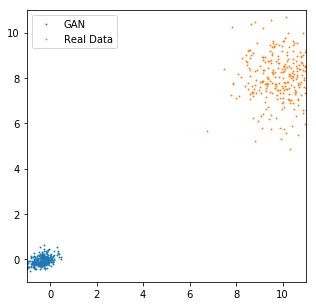

mean=tensor([-0.3513, -0.0606], device='cuda:0'), std=tensor([ 0.3149,  0.2041], device='cuda:0')
Epoch [500/100000], d_loss: 0.8933, g_loss: 0.5739, D(x): 0.94, D(G(z)): 0.56


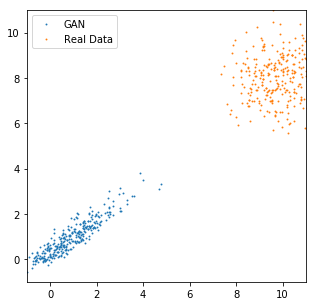

mean=tensor([ 0.9283,  0.9842], device='cuda:0'), std=tensor([ 1.0417,  0.7867], device='cuda:0')
Epoch [1000/100000], d_loss: 1.0535, g_loss: 0.5663, D(x): 0.84, D(G(z)): 0.58


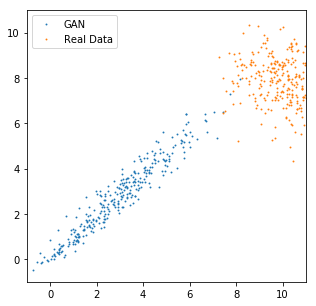

mean=tensor([ 2.9552,  2.7911], device='cuda:0'), std=tensor([ 1.7763,  1.6450], device='cuda:0')
Epoch [1500/100000], d_loss: 1.1941, g_loss: 0.5938, D(x): 0.71, D(G(z)): 0.56


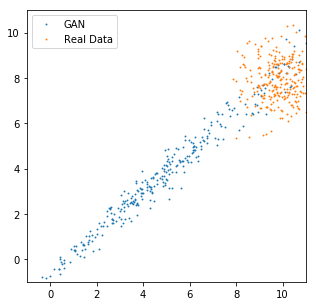

mean=tensor([ 5.2450,  4.0542], device='cuda:0'), std=tensor([ 3.0176,  2.6970], device='cuda:0')
Epoch [2000/100000], d_loss: 1.3305, g_loss: 0.6543, D(x): 0.58, D(G(z)): 0.53


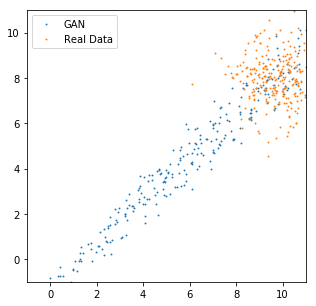

mean=tensor([ 7.0650,  5.4076], device='cuda:0'), std=tensor([ 4.1675,  3.8357], device='cuda:0')
Epoch [2500/100000], d_loss: 1.4226, g_loss: 0.7232, D(x): 0.49, D(G(z)): 0.50


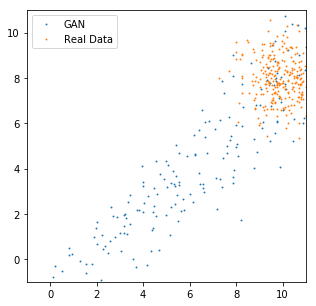

mean=tensor([ 9.6882,  7.1576], device='cuda:0'), std=tensor([ 6.3350,  5.8173], device='cuda:0')
Epoch [3000/100000], d_loss: 1.4531, g_loss: 0.7511, D(x): 0.45, D(G(z)): 0.47


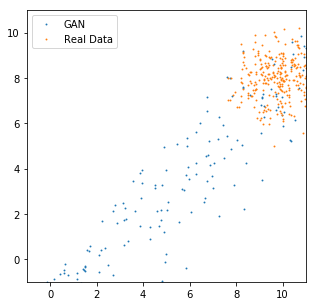

mean=tensor([ 10.5925,   7.8266], device='cuda:0'), std=tensor([ 8.3927,  7.6753], device='cuda:0')
Epoch [3500/100000], d_loss: 1.4292, g_loss: 0.7627, D(x): 0.45, D(G(z)): 0.47


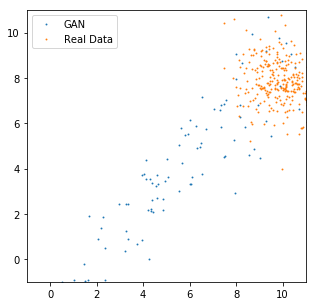

mean=tensor([ 11.5326,   9.4690], device='cuda:0'), std=tensor([ 11.3147,  11.4703], device='cuda:0')
Epoch [4000/100000], d_loss: 1.4054, g_loss: 0.8074, D(x): 0.45, D(G(z)): 0.45


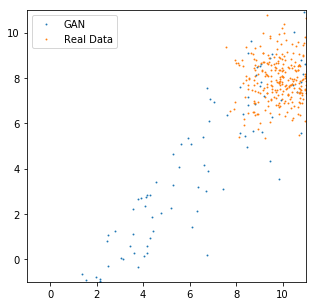

mean=tensor([ 12.3649,   9.5897], device='cuda:0'), std=tensor([ 12.3099,  12.7603], device='cuda:0')
Epoch [4500/100000], d_loss: 1.3659, g_loss: 0.7935, D(x): 0.47, D(G(z)): 0.46


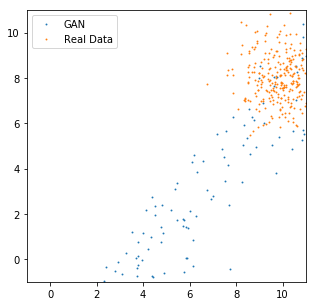

mean=tensor([ 10.9243,   6.3355], device='cuda:0'), std=tensor([ 10.1473,   9.6600], device='cuda:0')
Epoch [5000/100000], d_loss: 1.3508, g_loss: 0.7827, D(x): 0.48, D(G(z)): 0.46


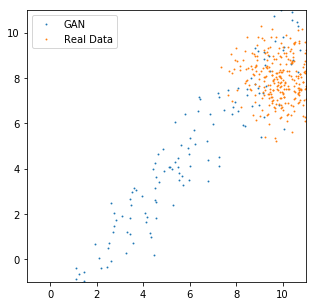

mean=tensor([ 11.2704,   9.7637], device='cuda:0'), std=tensor([ 9.3647,  9.8291], device='cuda:0')
Epoch [5500/100000], d_loss: 1.3545, g_loss: 0.7352, D(x): 0.50, D(G(z)): 0.48


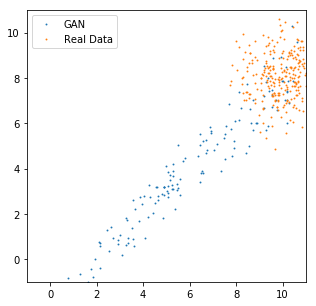

mean=tensor([ 11.3865,   8.1755], device='cuda:0'), std=tensor([ 8.4906,  7.1170], device='cuda:0')
Epoch [6000/100000], d_loss: 1.3664, g_loss: 0.6933, D(x): 0.51, D(G(z)): 0.50


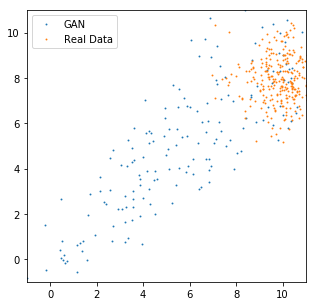

mean=tensor([ 9.8636,  8.1755], device='cuda:0'), std=tensor([ 6.4624,  5.2371], device='cuda:0')
Epoch [6500/100000], d_loss: 1.3970, g_loss: 0.6870, D(x): 0.50, D(G(z)): 0.50


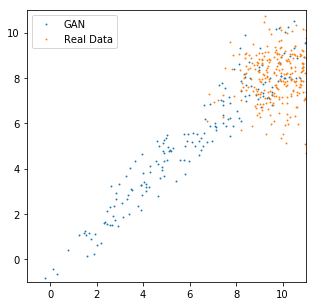

mean=tensor([ 9.8695,  8.1291], device='cuda:0'), std=tensor([ 6.1053,  4.9014], device='cuda:0')
Epoch [7000/100000], d_loss: 1.3887, g_loss: 0.6780, D(x): 0.51, D(G(z)): 0.51


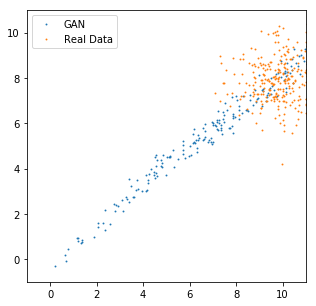

mean=tensor([ 9.9540,  7.6602], device='cuda:0'), std=tensor([ 5.4595,  3.8599], device='cuda:0')
Epoch [7500/100000], d_loss: 1.3899, g_loss: 0.6839, D(x): 0.50, D(G(z)): 0.50


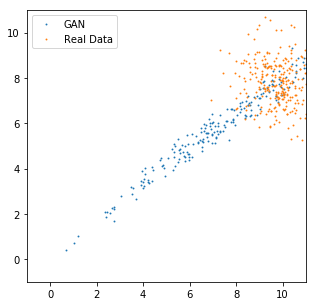

mean=tensor([ 9.7836,  7.5008], device='cuda:0'), std=tensor([ 4.6117,  3.1215], device='cuda:0')
Epoch [8000/100000], d_loss: 1.3886, g_loss: 0.6880, D(x): 0.50, D(G(z)): 0.50


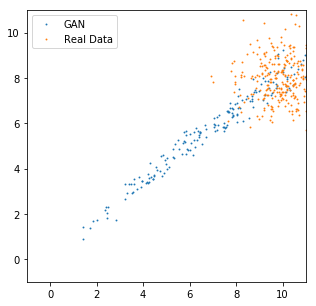

mean=tensor([ 10.3500,   7.9832], device='cuda:0'), std=tensor([ 5.0750,  3.4243], device='cuda:0')
Epoch [8500/100000], d_loss: 1.3810, g_loss: 0.6961, D(x): 0.50, D(G(z)): 0.50


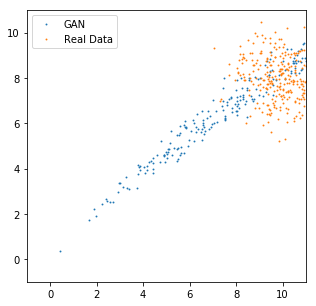

mean=tensor([ 9.8980,  8.1540], device='cuda:0'), std=tensor([ 4.6829,  3.2371], device='cuda:0')
Epoch [9000/100000], d_loss: 1.3822, g_loss: 0.7041, D(x): 0.50, D(G(z)): 0.49


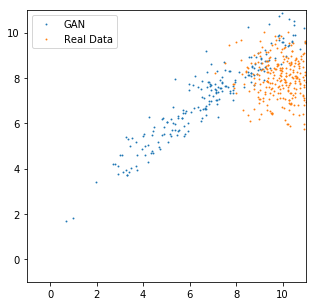

mean=tensor([ 9.2178,  8.8657], device='cuda:0'), std=tensor([ 4.3647,  3.2259], device='cuda:0')
Epoch [9500/100000], d_loss: 1.3664, g_loss: 0.6941, D(x): 0.51, D(G(z)): 0.50


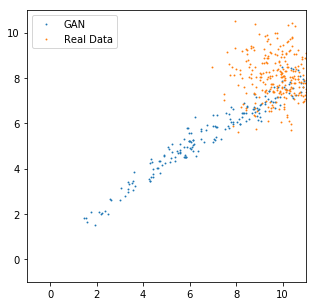

mean=tensor([ 10.4681,   7.5790], device='cuda:0'), std=tensor([ 5.5323,  3.2765], device='cuda:0')
Epoch [10000/100000], d_loss: 1.3862, g_loss: 0.7042, D(x): 0.50, D(G(z)): 0.50


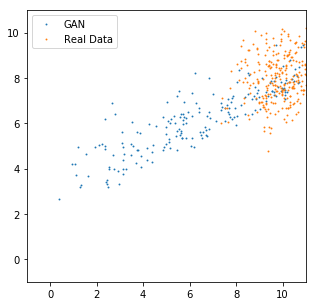

mean=tensor([ 9.8870,  8.0151], device='cuda:0'), std=tensor([ 5.8485,  3.1205], device='cuda:0')
Epoch [10500/100000], d_loss: 1.3796, g_loss: 0.6847, D(x): 0.51, D(G(z)): 0.51


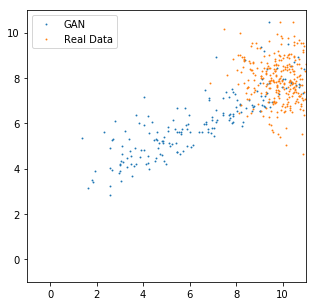

mean=tensor([ 10.4318,   8.0030], device='cuda:0'), std=tensor([ 6.2135,  3.1863], device='cuda:0')
Epoch [11000/100000], d_loss: 1.3670, g_loss: 0.7245, D(x): 0.50, D(G(z)): 0.48


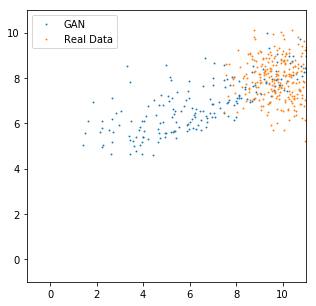

mean=tensor([ 10.0993,   8.5560], device='cuda:0'), std=tensor([ 5.6307,  2.8043], device='cuda:0')
Epoch [11500/100000], d_loss: 1.3526, g_loss: 0.6860, D(x): 0.52, D(G(z)): 0.50


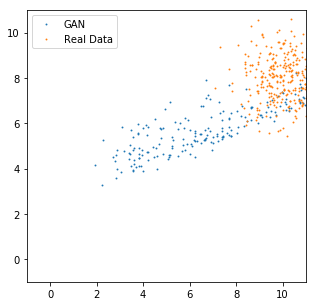

mean=tensor([ 9.9854,  7.1461], device='cuda:0'), std=tensor([ 5.4686,  2.4027], device='cuda:0')
Epoch [12000/100000], d_loss: 1.3596, g_loss: 0.7265, D(x): 0.50, D(G(z)): 0.48


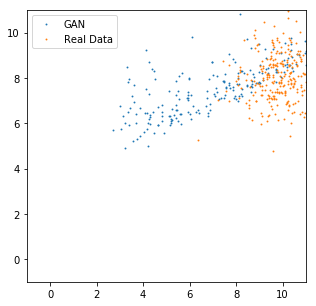

mean=tensor([ 9.7799,  9.0073], device='cuda:0'), std=tensor([ 4.8190,  2.6138], device='cuda:0')
Epoch [12500/100000], d_loss: 1.3638, g_loss: 0.6969, D(x): 0.51, D(G(z)): 0.50


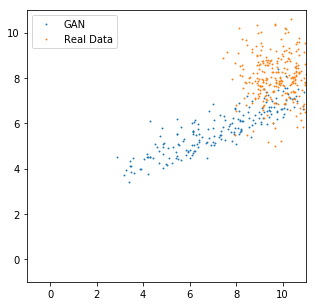

mean=tensor([ 9.9595,  6.9197], device='cuda:0'), std=tensor([ 4.4820,  2.0742], device='cuda:0')
Epoch [13000/100000], d_loss: 1.3669, g_loss: 0.7166, D(x): 0.50, D(G(z)): 0.49


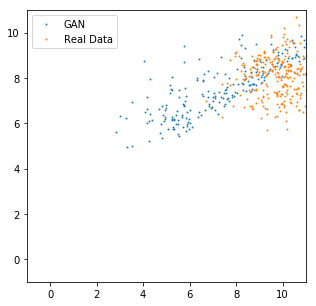

mean=tensor([ 9.7374,  8.8455], device='cuda:0'), std=tensor([ 4.2132,  2.3936], device='cuda:0')
Epoch [13500/100000], d_loss: 1.3660, g_loss: 0.6917, D(x): 0.51, D(G(z)): 0.50


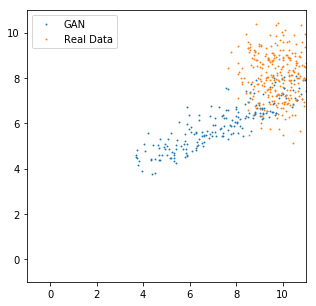

mean=tensor([ 10.0236,   7.1966], device='cuda:0'), std=tensor([ 4.6161,  2.2469], device='cuda:0')
Epoch [14000/100000], d_loss: 1.3703, g_loss: 0.7180, D(x): 0.50, D(G(z)): 0.49


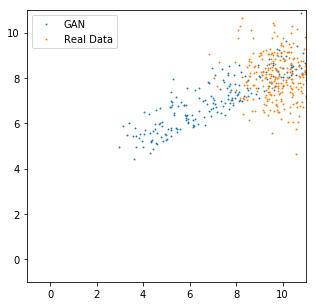

mean=tensor([ 9.7706,  8.4811], device='cuda:0'), std=tensor([ 4.5501,  2.5437], device='cuda:0')
Epoch [14500/100000], d_loss: 1.3817, g_loss: 0.6756, D(x): 0.51, D(G(z)): 0.51


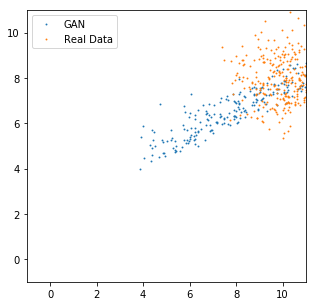

mean=tensor([ 9.9631,  7.6972], device='cuda:0'), std=tensor([ 4.0105,  2.1333], device='cuda:0')
Epoch [15000/100000], d_loss: 1.3981, g_loss: 0.7045, D(x): 0.49, D(G(z)): 0.50


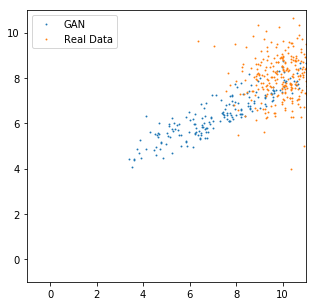

mean=tensor([ 10.2461,   7.9433], device='cuda:0'), std=tensor([ 4.5410,  2.4379], device='cuda:0')
Epoch [15500/100000], d_loss: 1.4032, g_loss: 0.6765, D(x): 0.50, D(G(z)): 0.51


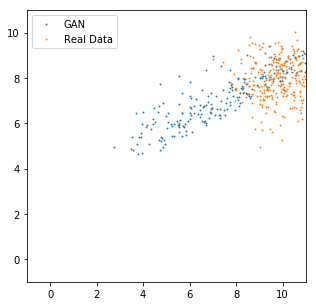

mean=tensor([ 9.6409,  8.3984], device='cuda:0'), std=tensor([ 4.2931,  2.4890], device='cuda:0')
Epoch [16000/100000], d_loss: 1.4086, g_loss: 0.6956, D(x): 0.49, D(G(z)): 0.50


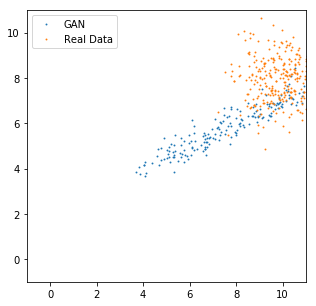

mean=tensor([ 10.6276,   7.3636], device='cuda:0'), std=tensor([ 4.6371,  2.4215], device='cuda:0')
Epoch [16500/100000], d_loss: 1.4061, g_loss: 0.6814, D(x): 0.50, D(G(z)): 0.51


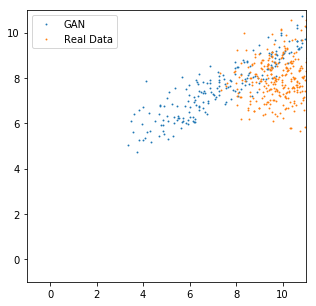

mean=tensor([ 9.6575,  8.9514], device='cuda:0'), std=tensor([ 4.0320,  2.4817], device='cuda:0')
Epoch [17000/100000], d_loss: 1.3924, g_loss: 0.6947, D(x): 0.50, D(G(z)): 0.50


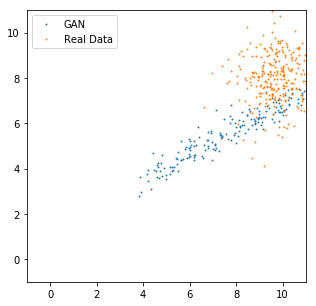

mean=tensor([ 10.8481,   7.1969], device='cuda:0'), std=tensor([ 4.7317,  2.4621], device='cuda:0')
Epoch [17500/100000], d_loss: 1.3854, g_loss: 0.7005, D(x): 0.50, D(G(z)): 0.50


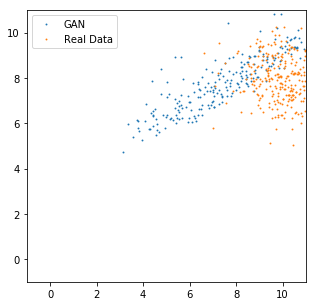

mean=tensor([ 9.3423,  8.9858], device='cuda:0'), std=tensor([ 3.8240,  2.4139], device='cuda:0')
Epoch [18000/100000], d_loss: 1.3632, g_loss: 0.7002, D(x): 0.51, D(G(z)): 0.50


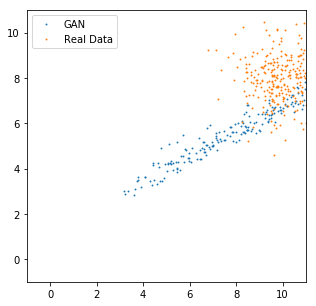

mean=tensor([ 10.8885,   7.1670], device='cuda:0'), std=tensor([ 4.9019,  2.6010], device='cuda:0')
Epoch [18500/100000], d_loss: 1.3648, g_loss: 0.7116, D(x): 0.50, D(G(z)): 0.49


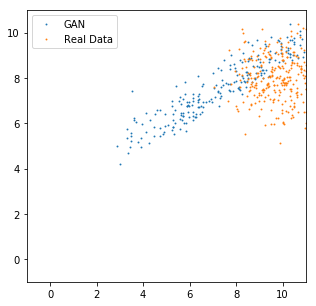

mean=tensor([ 9.3264,  8.7974], device='cuda:0'), std=tensor([ 4.0656,  2.5483], device='cuda:0')
Epoch [19000/100000], d_loss: 1.3591, g_loss: 0.7031, D(x): 0.51, D(G(z)): 0.50


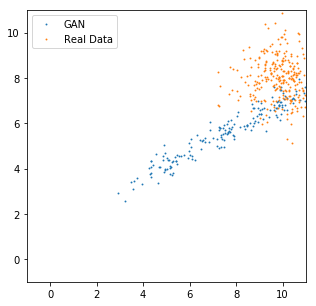

mean=tensor([ 10.7903,   7.3126], device='cuda:0'), std=tensor([ 4.6630,  2.4946], device='cuda:0')
Epoch [19500/100000], d_loss: 1.3591, g_loss: 0.7135, D(x): 0.50, D(G(z)): 0.49


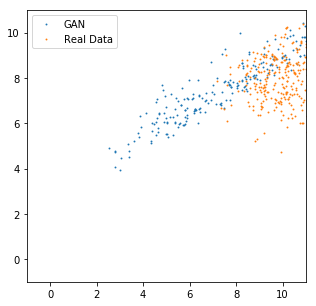

mean=tensor([ 9.6261,  8.9115], device='cuda:0'), std=tensor([ 4.2897,  2.6998], device='cuda:0')
Epoch [20000/100000], d_loss: 1.3627, g_loss: 0.6929, D(x): 0.51, D(G(z)): 0.50


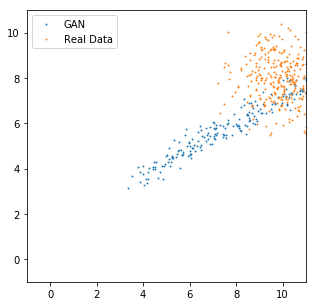

mean=tensor([ 10.1601,   7.1963], device='cuda:0'), std=tensor([ 4.4554,  2.4526], device='cuda:0')
Epoch [20500/100000], d_loss: 1.3629, g_loss: 0.7165, D(x): 0.50, D(G(z)): 0.49


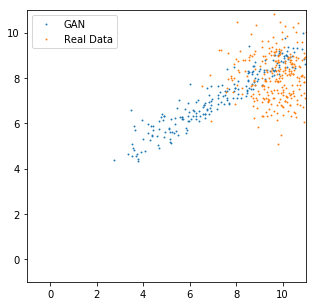

mean=tensor([ 9.5388,  8.5625], device='cuda:0'), std=tensor([ 4.1531,  2.6438], device='cuda:0')
Epoch [21000/100000], d_loss: 1.3668, g_loss: 0.6873, D(x): 0.51, D(G(z)): 0.50


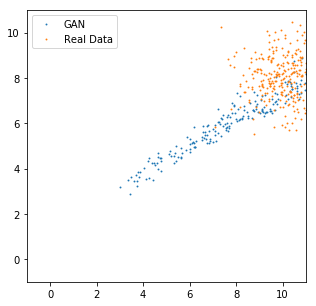

mean=tensor([ 10.2208,   7.4428], device='cuda:0'), std=tensor([ 4.2233,  2.4190], device='cuda:0')
Epoch [21500/100000], d_loss: 1.3690, g_loss: 0.7138, D(x): 0.50, D(G(z)): 0.49


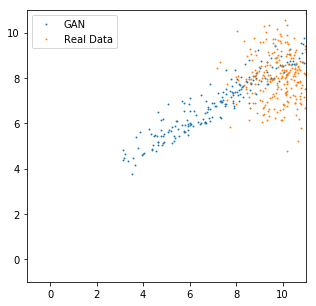

mean=tensor([ 9.6752,  8.3642], device='cuda:0'), std=tensor([ 4.1552,  2.5402], device='cuda:0')
Epoch [22000/100000], d_loss: 1.3747, g_loss: 0.6765, D(x): 0.51, D(G(z)): 0.51


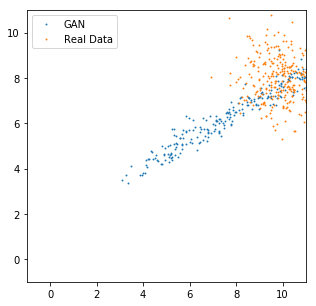

mean=tensor([ 9.5650,  7.3880], device='cuda:0'), std=tensor([ 4.1526,  2.4412], device='cuda:0')
Epoch [22500/100000], d_loss: 1.3768, g_loss: 0.7133, D(x): 0.50, D(G(z)): 0.49


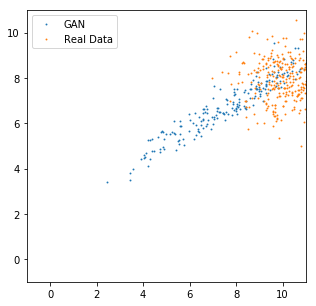

mean=tensor([ 10.2611,   8.3716], device='cuda:0'), std=tensor([ 4.3734,  2.7184], device='cuda:0')
Epoch [23000/100000], d_loss: 1.3836, g_loss: 0.6740, D(x): 0.51, D(G(z)): 0.51


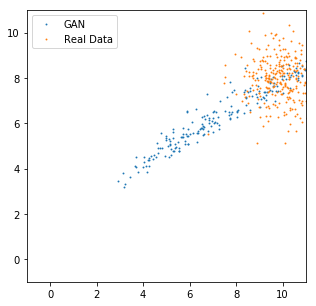

mean=tensor([ 9.7183,  7.7703], device='cuda:0'), std=tensor([ 4.0280,  2.4423], device='cuda:0')
Epoch [23500/100000], d_loss: 1.3905, g_loss: 0.7088, D(x): 0.49, D(G(z)): 0.49


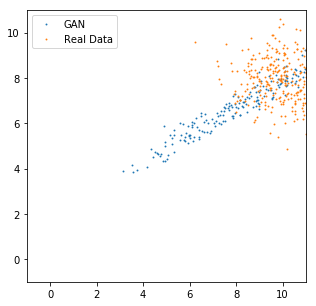

mean=tensor([ 10.7672,   8.3656], device='cuda:0'), std=tensor([ 4.3418,  2.6374], device='cuda:0')
Epoch [24000/100000], d_loss: 1.3975, g_loss: 0.6659, D(x): 0.51, D(G(z)): 0.52


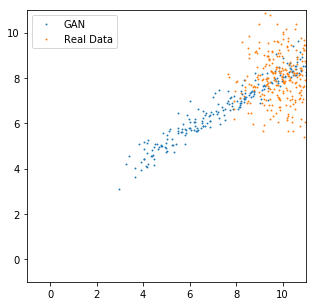

mean=tensor([ 9.3132,  7.7902], device='cuda:0'), std=tensor([ 3.7231,  2.3133], device='cuda:0')
Epoch [24500/100000], d_loss: 1.4034, g_loss: 0.7059, D(x): 0.49, D(G(z)): 0.49


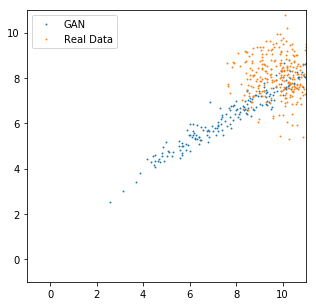

mean=tensor([ 10.7223,   8.0357], device='cuda:0'), std=tensor([ 4.6629,  2.7846], device='cuda:0')
Epoch [25000/100000], d_loss: 1.4040, g_loss: 0.6624, D(x): 0.51, D(G(z)): 0.52


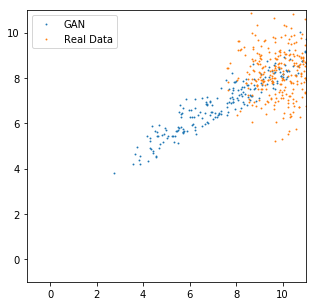

mean=tensor([ 9.6092,  8.2506], device='cuda:0'), std=tensor([ 3.8473,  2.4375], device='cuda:0')
Epoch [25500/100000], d_loss: 1.4106, g_loss: 0.7013, D(x): 0.48, D(G(z)): 0.50


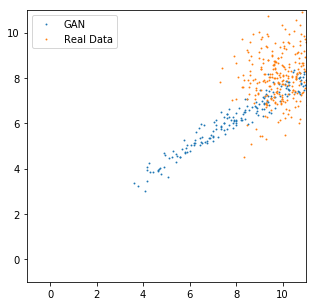

mean=tensor([ 10.7983,   7.8374], device='cuda:0'), std=tensor([ 4.3902,  2.6267], device='cuda:0')
Epoch [26000/100000], d_loss: 1.4123, g_loss: 0.6627, D(x): 0.50, D(G(z)): 0.52


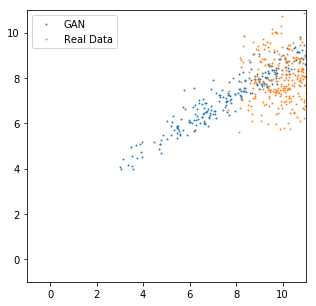

mean=tensor([ 9.2994,  8.1908], device='cuda:0'), std=tensor([ 3.6400,  2.3901], device='cuda:0')
Epoch [26500/100000], d_loss: 1.4124, g_loss: 0.6995, D(x): 0.48, D(G(z)): 0.50


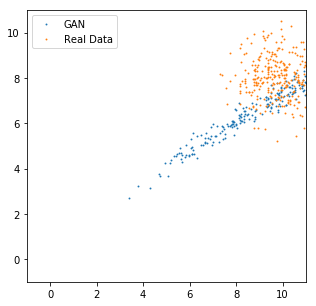

mean=tensor([ 11.0315,   7.8460], device='cuda:0'), std=tensor([ 4.4256,  2.6456], device='cuda:0')
Epoch [27000/100000], d_loss: 1.4112, g_loss: 0.6600, D(x): 0.51, D(G(z)): 0.52


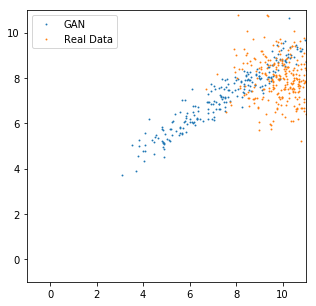

mean=tensor([ 9.1490,  8.2313], device='cuda:0'), std=tensor([ 3.5080,  2.3172], device='cuda:0')
Epoch [27500/100000], d_loss: 1.4156, g_loss: 0.7019, D(x): 0.48, D(G(z)): 0.50


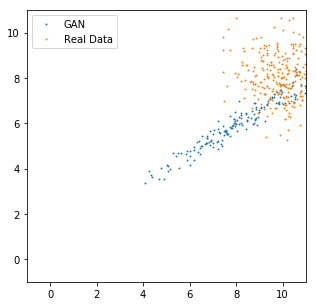

mean=tensor([ 11.4408,   7.9605], device='cuda:0'), std=tensor([ 4.6660,  2.7575], device='cuda:0')
Epoch [28000/100000], d_loss: 1.4129, g_loss: 0.6587, D(x): 0.51, D(G(z)): 0.52


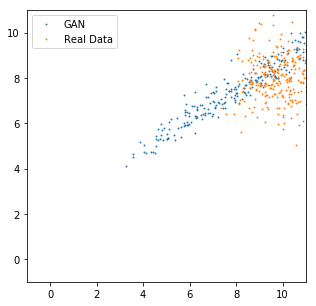

mean=tensor([ 9.3578,  8.4159], device='cuda:0'), std=tensor([ 3.4389,  2.3295], device='cuda:0')
Epoch [28500/100000], d_loss: 1.4122, g_loss: 0.6994, D(x): 0.48, D(G(z)): 0.50


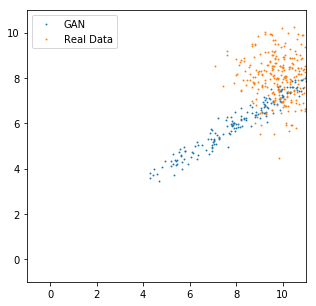

mean=tensor([ 11.0439,   7.7099], device='cuda:0'), std=tensor([ 4.2669,  2.4961], device='cuda:0')
Epoch [29000/100000], d_loss: 1.4128, g_loss: 0.6606, D(x): 0.50, D(G(z)): 0.52


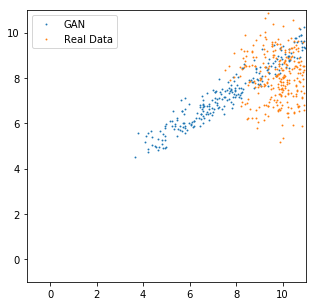

mean=tensor([ 8.9608,  8.1695], device='cuda:0'), std=tensor([ 3.3932,  2.2809], device='cuda:0')
Epoch [29500/100000], d_loss: 1.4163, g_loss: 0.7037, D(x): 0.48, D(G(z)): 0.49


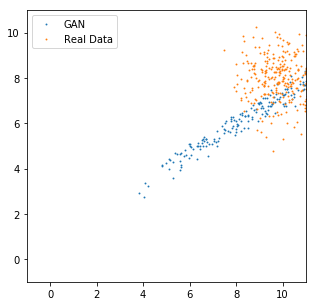

mean=tensor([ 10.8867,   7.6731], device='cuda:0'), std=tensor([ 3.8538,  2.3227], device='cuda:0')
Epoch [30000/100000], d_loss: 1.4133, g_loss: 0.6585, D(x): 0.51, D(G(z)): 0.52


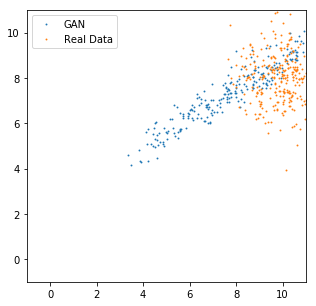

mean=tensor([ 9.0630,  8.2130], device='cuda:0'), std=tensor([ 3.3544,  2.2148], device='cuda:0')
Epoch [30500/100000], d_loss: 1.4155, g_loss: 0.6968, D(x): 0.48, D(G(z)): 0.50


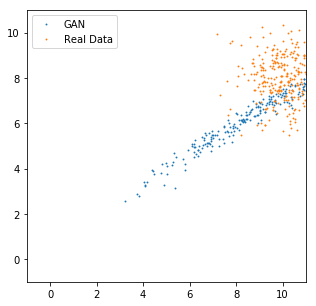

mean=tensor([ 10.4468,   7.3602], device='cuda:0'), std=tensor([ 3.8459,  2.2911], device='cuda:0')
Epoch [31000/100000], d_loss: 1.4139, g_loss: 0.6566, D(x): 0.51, D(G(z)): 0.52


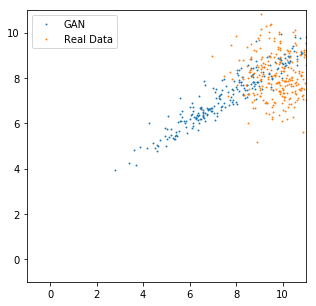

mean=tensor([ 8.8919,  8.0425], device='cuda:0'), std=tensor([ 3.0823,  2.0619], device='cuda:0')
Epoch [31500/100000], d_loss: 1.4120, g_loss: 0.7028, D(x): 0.48, D(G(z)): 0.50


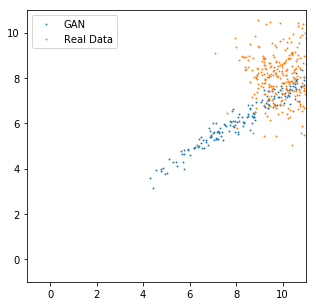

mean=tensor([ 10.9076,   7.7860], device='cuda:0'), std=tensor([ 3.7948,  2.2947], device='cuda:0')
Epoch [32000/100000], d_loss: 1.4129, g_loss: 0.6581, D(x): 0.50, D(G(z)): 0.52


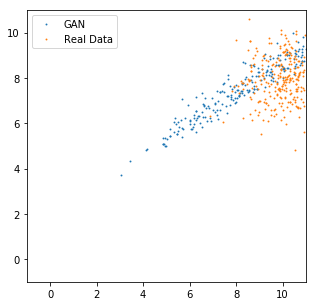

mean=tensor([ 9.7210,  8.5268], device='cuda:0'), std=tensor([ 3.3669,  2.2683], device='cuda:0')
Epoch [32500/100000], d_loss: 1.4135, g_loss: 0.7013, D(x): 0.48, D(G(z)): 0.50


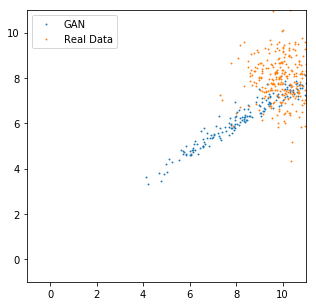

mean=tensor([ 10.8520,   7.7486], device='cuda:0'), std=tensor([ 3.8526,  2.3260], device='cuda:0')
Epoch [33000/100000], d_loss: 1.4124, g_loss: 0.6565, D(x): 0.51, D(G(z)): 0.52


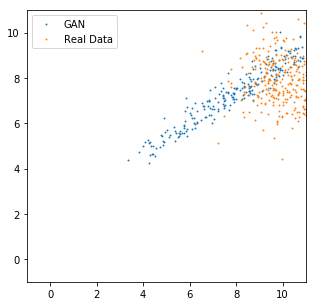

mean=tensor([ 9.0502,  8.0640], device='cuda:0'), std=tensor([ 2.9175,  1.9643], device='cuda:0')
Epoch [33500/100000], d_loss: 1.4110, g_loss: 0.7036, D(x): 0.48, D(G(z)): 0.50


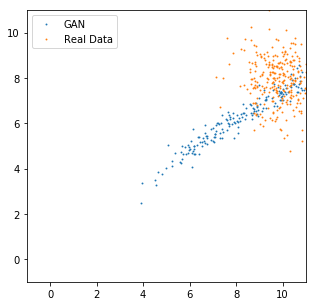

mean=tensor([ 10.3911,   7.5798], device='cuda:0'), std=tensor([ 3.4733,  2.1531], device='cuda:0')
Epoch [34000/100000], d_loss: 1.4109, g_loss: 0.6629, D(x): 0.50, D(G(z)): 0.51


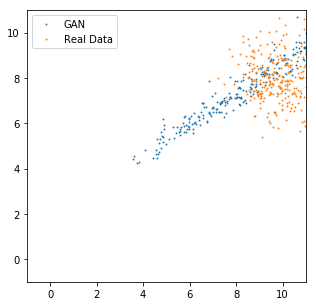

mean=tensor([ 9.0854,  8.0094], device='cuda:0'), std=tensor([ 2.8672,  1.9231], device='cuda:0')
Epoch [34500/100000], d_loss: 1.4082, g_loss: 0.7043, D(x): 0.48, D(G(z)): 0.49


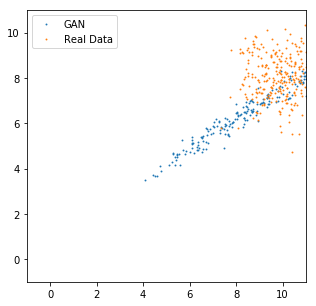

mean=tensor([ 10.3317,   7.6130], device='cuda:0'), std=tensor([ 3.4317,  2.1495], device='cuda:0')
Epoch [35000/100000], d_loss: 1.4062, g_loss: 0.6561, D(x): 0.51, D(G(z)): 0.52


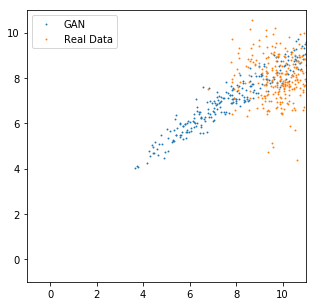

mean=tensor([ 8.9005,  7.8006], device='cuda:0'), std=tensor([ 2.9875,  1.9797], device='cuda:0')
Epoch [35500/100000], d_loss: 1.4093, g_loss: 0.7098, D(x): 0.48, D(G(z)): 0.49


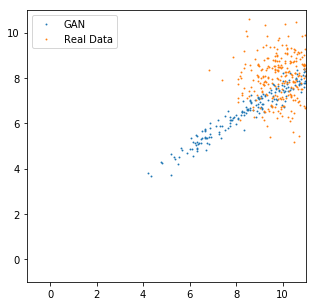

mean=tensor([ 10.7489,   7.8873], device='cuda:0'), std=tensor([ 3.4333,  2.1271], device='cuda:0')
Epoch [36000/100000], d_loss: 1.4075, g_loss: 0.6589, D(x): 0.51, D(G(z)): 0.52


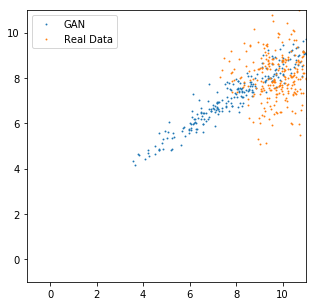

mean=tensor([ 9.0235,  7.9362], device='cuda:0'), std=tensor([ 2.8066,  1.9047], device='cuda:0')
Epoch [36500/100000], d_loss: 1.4121, g_loss: 0.6970, D(x): 0.49, D(G(z)): 0.50


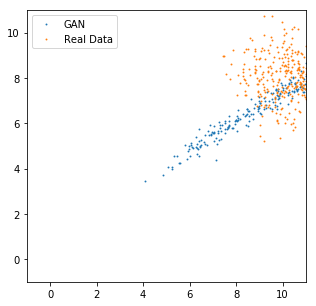

mean=tensor([ 10.4342,   7.5652], device='cuda:0'), std=tensor([ 3.1559,  1.9652], device='cuda:0')
Epoch [37000/100000], d_loss: 1.4104, g_loss: 0.6663, D(x): 0.50, D(G(z)): 0.51


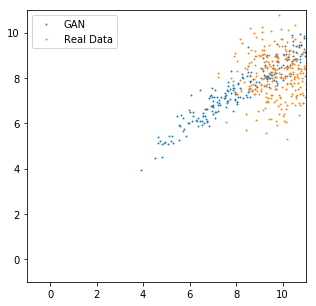

mean=tensor([ 9.5723,  8.4322], device='cuda:0'), std=tensor([ 2.8578,  1.9711], device='cuda:0')
Epoch [37500/100000], d_loss: 1.4127, g_loss: 0.6933, D(x): 0.49, D(G(z)): 0.50


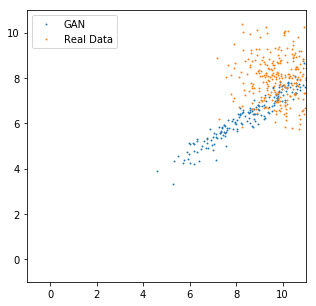

mean=tensor([ 10.7784,   7.6785], device='cuda:0'), std=tensor([ 3.3873,  2.0768], device='cuda:0')
Epoch [38000/100000], d_loss: 1.4143, g_loss: 0.6610, D(x): 0.50, D(G(z)): 0.52


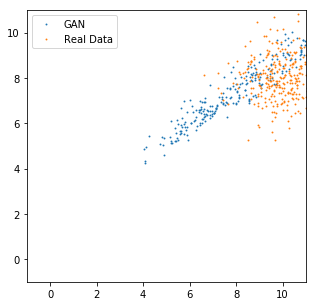

mean=tensor([ 9.1054,  8.1892], device='cuda:0'), std=tensor([ 2.9388,  2.0903], device='cuda:0')


KeyboardInterrupt: 

In [6]:
for epoch in range(max_epoch):
    
    # Build mini-batch dataset
    x = sample_real(batch_size).cuda()

    # Create the labels which are later used as input for the BCE loss
    real_labels = torch.ones(batch_size,1).cuda()
    fake_labels = torch.zeros(batch_size,1).cuda()


    #============= Train the discriminator =============#
    # Compute BCE_Loss using real images where BCE_Loss(x, y): - y * log(D(x)) - (1-y) * log(1 - D(x))
    # Second term of the loss is always zero since real_labels == 1    
    outputs = D(x)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Compute BCELoss using fake images
    # First term of the loss is always zero since fake_labels == 0    
    z = torch.randn(batch_size, z_dim).cuda()
    fake_images = G(z).detach()
    outputs = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Backprop + Optimize
    d_loss = d_loss_real + d_loss_fake
    D.zero_grad()
    d_loss.backward()
    d_optimizer.step()

    #=============== Train the generator ===============#
    z = torch.randn(batch_size, z_dim).cuda()
    fake_images = G(z)
    outputs = D(fake_images)

    # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
    g_loss = criterion(outputs, real_labels)

    # Backprop + Optimize
    D.zero_grad()
    G.zero_grad()
    g_loss.backward()
    g_optimizer.step()
    
    if epoch%500==0:
#         print('epoch={}, loss={}'.format(epoch,loss.data.numpy()[0]))
        print('Epoch [%d/%d], d_loss: %.4f, g_loss: %.4f, D(x): %.2f, D(G(z)): %.2f'
              %(epoch, max_epoch, d_loss.item(), g_loss.item(), real_score.data.mean(), fake_score.data.mean()))

    if epoch%500==0:
        mean, std = plot_decoder()
        plt.show()
        print('mean={}, std={}'.format(mean, std))
